# Expectation Maximisation: Coin Flips

#### Author: Tirtharaj Dash, The Boolean Lab, UC San Diego,  tdash@ucsd.edu

## Preliminary

### Bias of a coin

If I have a coin A and I wanted to know the bias of this coin, where 'bias' refers to the probability of getting a head if we toss the coin, what I would do is I will toss the coin $n$ times and count the number of heads it lands in, say $k$ and then the bias is $\frac{k}{n}$.

Example: If I toss a coin $n=10$ times and it lands in $k=7$ heads (say, `HHTHHTTHHH`), then the bias is: $\frac{7}{10} = 0.7$. 

Notice that if we increase $n$ our belief of the bias of the coin will be more stronger. Why? 

Related: [Law of large numbers in Probability Theory](https://en.wikipedia.org/wiki/Law_of_large_numbers)


### Maximum Likelihood Estimate (MLE)

If I tossed a coin for $n$ times and got $k$ heads (with $k \leq n$, of course), then the MLE is $\left(\frac{k}{n},1-\frac{k}{n}\right)$. 

MLE is a method of estimating the parameters of an unassumed probability distribution, given some *observed data*, here the coin tosses.

Related: [MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

### Bayes' Theorem

The Bayess theorem is stated as the equation:
$$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} $$

where $A$ and $B$ are events and $p(B) \neq 0$.

 - $p(A\mid B)$ is a conditional probability: the probability of event $A$ occurring given that $B$ is true. It is also called the *posterior probability* of $A$ given $B$.
 - $p(B\mid A)$ is also a conditional probability: the probability of event $B$ occurring given that $A$ is true. It can also be interpreted as the likelihood of $A$ given a fixed $B$.
 - $p(A)$ and $p(B)$ are the probabilities of observing $A$ and $B$ respectively without any given conditions; they are known as the prior probability and marginal probability, respectively.

### Law of Total Probability

$p(B)$ above can be calculated as: $$ p(B) = \sum_{n} p(A_n, B).$$

Refer: [wiki](https://en.wikipedia.org/wiki/Law_of_total_probability) for more details.

## Expectation Maximisation (EM)

EM is an *iterative* method for finding MLE (or Maximum a posteriori, MAP) estimates of parameters in statistical models, where the model depends on unobserved latent variables. Here, we will discuss about EM based on coin flips experiment as discussed in this paper: "What is the expectation maximisation algorithm?", *Nature Biotech*, 2008. [Link](https://www.nature.com/articles/nbt1406)

### Coin flip experiment (Case: Complete Data)

Suppose your friend has posed a challenge: estimate the bias of two coins in her possession (Coin A and Coin B). They might be fair coins, be more heavily weighted towards heads; you don't know. Here's the clue she's provided: a piece of paper with 5 records of an experiment where she's:

<ul>
    <li> Chosen one of the two coins at random.
    <li> Flipped that same coint 10 times.
</ul>

This is what she has on the paper:

| Coin |    Flips   |
|:----:|:----------:|
| B    | HTTTHHTHTH |
| A    | HHHHTHHHHH |
| A    | HTHHHHHTHH |
| B    | HTHTTTHHTT |
| A    | THHHTHHHTH |

Q. How can you provide a reasonable estimate of each coin bias? Let's refer to these biases as $\theta_A$ and $\theta_B$, resp. for Coin A and Coin B.

Let's count the number of heads for each coin in eachg trial like this:

| Coin |    Flips   | #Coin A heads | #Coin B heads |
|:----:|:----------:|:-------------:|:-------------:|
|   B  | HTTTHHTHTH |        0      |        5      |
|   A  | HHHHTHHHHH |        9      |        0      |
|   A  | HTHHHHHTHH |        8      |        0      |
|   B  | HTHTTTHHTT |        0      |        4      |
|   A  | THHHTHHHTH |        7      |        0      |

In this case it's easy, as we discussed about bias of a coin our prelim section. Here, it just boils down to estimating each independently. Let's start with coin A: across three trials of 10 flips, there are 24 heads. So a reasonable estimate of the coin bias would be 24/30 or 0.8.

To estimate the bias of coin B, we have 9 heads across 2 sets of 10 flips for an estimated bias of 9/20 = 0.45.

So when we know everything, in the *complete data case*, our problem is very easy and tractable, that is, no matter how many such trials are giveen to us, we can always effectively count the number of heads for each coin across trials.

### Coin flip experiment (Case: Incomplete data)

Now let's make the problem harder: what if we are shown the same trials as above, but do not know which coin was chosen for each set of 10 flips? We only know that each coin has an equal chance of being chosen each time.

In this scenario, the coin is not observed, and could be considered a *hidden* or *latent variable*. EM comes in handy for all sorts of so called "latent variable" models, including Gaussian Mixture Models and Hidden Markov Models; we shall discuss these later. This coin toss example is merely a contrived example to provide as simple a latent variable model as possible.

| Coin |    Flips   | #Coin A heads | #Coin B heads |
|:----:|:----------:|:-------------:|:-------------:|
|   ?  | HTTTHHTHTH |        ?      |        ?      |
|   ?  | HHHHTHHHHH |        ?      |        ?      |
|   ?  | HTHHHHHTHH |        ?      |        ?      |
|   ?  | HTHTTTHHTT |        ?      |        ?      |
|   ?  | THHHTHHHTH |        ?      |        ?      |

In this case, we can't simply count the number of heads that showed up for each coin, because we don't know the identity of the coin.



### Let's start by guessing a solution for the biases

Right now we're stuck, because we'd like to count up the number of heads for each coin, but we don't know which coin is being flipped in each trial. **It turns out that we can make progress by starting with a guess for the coin biases**, which will allow us to estimate which coin was chosen in each trial and come up with an estimate for the expected number of heads and tails for each coin across the trials (E-step). We then use these counts to recompute a better guess for each coin bias (M-step). By repeating these two steps, we continue to get a better estimate of the two coin biases and converge at a solution that turns out to be a local maximum to the problem.

### The E-Step

Even assuming we know the biases of each coin, how exactly do we estimate the number of heads and tails for each coin across the trials? One heuristic might be, for each trial, to see which coin bias better matches the flips and attribute all flips to that coin. So, for example, if we see `HHHHHHHHTT` and our current assumed biases for A and B are 0.4 and 0.7, respectively, it seems more likely that it was coin B, so for that trial, we just assume it *is* coin B and tally up "8 heads and 2 tails for coin B".

This approach seems ok, but what about cases that aren't so obvious? Like what if the trial is `HHHHHTTTTT` and our current assumed biases for A and B are 0.4 and 0.7? Assigning all of the flips to either coin for our estimate doesn't seem very accurate.

#### Estimating liklihood each coin was chosen

Let's not force ourselves to assume one coin or the other, but instead estimate the probability that each coin is the true coin given the flips we see in the trial, and use that to proportionally assign heads and tails counts to each coin. Let's make this concrete with one of the examples we just mentioned:

- our current biases for coin A and B are 0.4 and 0.7, respectively
- we observe the following flips: `HHHHHHHHTT`

what is the probability that these flips came from coin A and coin B? Let's call this series of flips *event* $E$, the event we chose A be $Z_A$ and B be $Z_B$.

First, let's assume we know it is coin A, with probability of heads 0.4 (and tails 0.6). What is the probability of seeing `HHHHHTTTTT`? We want to know the probability that a specific sequence of successes (heads) occured in a fixed set of trials (flips), which is exactly what the probability distribution of a [binomial random variable](https://onlinecourses.science.psu.edu/stat200/node/37) tells us:

The probability of getting $k$ heads in $n$ tosses with a coin with bias $p$ is $$^nC_r p^r (1-p)^{n-r}.$$

So for us these calculations become:

$$P(E | Z_A) = P(\text{HHHHHHHHTT} | \text{A chosen}) = \dfrac{10!}{8!2!} 0.4^8 0.6^2$$

Similarly, if we assume it was coint B, the probability of seeing these flips would be: 

$$P(E | Z_B) = P(\text{HHHHHHHHTT} | \text{B chosen}) = \dfrac{10!}{8!2!} 0.7^8 0.3^2$$

Thanks to Baye's theorem and the law of total probability, we can partition all of the events in $Z$ (which coin we choose) over $Z_A$ and $Z_B$ as we have to choose one or the other.

$$P(Z_A | E) = \dfrac{P(E | Z_A)P(Z_A)}{P(E|Z_A)P(Z_A) + P(E|Z_B)P(Z_B)}$$

We know $P(Z_A) = P(Z_B) = 0.5$ as that's how we've constructed the problem (equal chances of choosing A and B), so
the expression simplifies to:

$$P(Z_A | E) = \dfrac{P(E | Z_A)}{P(E|Z_A) + P(E|Z_B))} \\
=\dfrac{\dfrac{10!}{8!2!} 0.4^8 0.6^2}{\dfrac{10!}{8!2!} 0.4^8 0.6^2 + \dfrac{10!}{8!2!} 0.7^8 0.3^2} \\
=\dfrac{0.4^8 0.6^2}{0.4^8 0.6^2 + 0.7^8 0.3^2} = 0.0435$$

and for coin B:

$$P(Z_B | E) = \dfrac{0.7^8 0.3^2}{0.4^8 0.6^2 + 0.7^8 0.3^2} = 0.0956$$

So this passes our intuition: if we see 8 heads out of 10, it is much more likely that the coin with bias 0.7 was the coin chosen than the coin with bias 0.4.

Applying the same arithmetic to the other scenario with trial `HHHHHTTTTT` and biases for A and B are 0.4 and 0.7, we find that each coin is equally likely (0.5) to have been chosen, also matching our intuition. 

More generally, for a given trial $E$ with number of heads $h$ and number of tails $t$ = 10 - $h$:

$$P(Z_A | E) = \dfrac{\theta_A^h(1-\theta_A)^t}{\theta_A^h(1-\theta_A)^t + \theta_B^h(1-\theta_B)^t}$$

and

$$P(Z_B | E) = \dfrac{\theta_B^h(1-\theta_B)^t}{\theta_A^h(1-\theta_A)^t + \theta_B^h(1-\theta_B)^t}$$

#### Assigning expected number of flips to each coin

Now that we have an estimate for the relative likelihood each coin was chosen, we can estimate the number of heads and tails for each coin by multiplying these probabilities by the number of heads and tails in a trail. 

Here's one "E-step" filled out assuming our current parameters are $\theta_a^0$ = 0.6 and $\theta_b^0$ = 0.5.

|    Flips   | Probability it was coin A | Probability it was coin B | #heads attributed to A | #heads attributed to B |
|:----------:|:-------------------------:|:-------------------------:|:-----------------------:|:-----------------------:|
| HTTTHHTHTH |            0.45           |            0.55           |           2.2           |           2.8           |
| HHHHTHHHHH |            0.8            |            0.2            |           7.2           |           1.8           |
| HTHHHHHTHH |            0.73           |            0.27           |           5.9           |           2.1           |
| HTHTTTHHTT |            0.35           |            0.65           |           1.4           |           2.6           |
| THHHTHHHTH |            0.65           |            0.35           |           4.5           |           2.5           |

### The M-Step

Once we have an estimate for the number of heads and tails for each coin, how do we improve our estimate for the coin biases? This part is easy: for each coin we divide the expected number of heads by the number of total flips, just like we did for the simplified scenario where we know which coin was chosen each time.

$\theta_a^1 = \dfrac{2.2 + 7.2 + 5.9 + 1.4 + 4.5}{10*(.45 + .8 + .73 + .35 + .65)} = 0.71$

$\theta_b^1 = \dfrac{2.8 + 1.8 + 2.1 + 2.6 + 2.5}{10*(.55+.2+.27+.65+.35)} = 0.58$

Another way to put it: we are M-is-for-maximizing the likelihood of the flip counts we estimated in the e-step by assuming the coin biases match up proportionally.

With updated estimates for $\theta_a$ and $\theta_b$, we can repeat the E-step again.

To review, we take a problem of estimating coin biases that *would be easy if we had the complete data*, that is, if we knew which coin was chosen, and made it tractable by iteratively:

- Assuming we have the coin biases, computing the expected number of heads and tails for each coin for the trials we see (the E-step)
- Given these counts of heads and tails, providing an improved guess at the coin biases by simply dividing the number of heads by total flips for each coin.


### EM in general

More generally, the EM algorithm helps us estimate the parameters of a probability distribution where:

- We are given samples from the distribution where some of the variables are missing
- If we had access to these missing values, estimating the parameters would be easy

by iteratively:

- Guessing the parameters of the distribution and using this to fill in or characterize the values of the missing data (the E-step)
- With these estimates for the missing data in hand, easily updating the values of our model

We will write some simple codes next to take care of these computation.

## Implementating EM

Let's now implement the algorithm described above and work through the same example.

In [23]:
import numpy as np

def coin_em(rolls, theta_A=None, theta_B=None, prior_A=0.5, maxiter=10):
    # Initial Guess
    theta_A = theta_A or random.random()
    theta_B = theta_B or random.random()
    thetas = [(theta_A, theta_B)]
    # Iterate
    for c in range(maxiter):
        print("#%d:\t%0.2f %0.2f" % (c, theta_A, theta_B))
        heads_A, tails_A, heads_B, tails_B = e_step(rolls, theta_A, theta_B, prior_A)
        theta_A, theta_B = m_step(heads_A, tails_A, heads_B, tails_B)
        
    thetas.append((theta_A,theta_B))    
    return thetas, (theta_A,theta_B)

def e_step(rolls, theta_A, theta_B, prior_A=0.5):
    """Produce the expected value for heads_A, tails_A, heads_B, tails_B 
    over the rolls given the coin biases"""
    
    heads_A, tails_A = 0,0
    heads_B, tails_B = 0,0
    prior_B = 1 - prior_A
    
    for trial in rolls:
        likelihood_A = coin_likelihood(trial, theta_A)
        likelihood_B = coin_likelihood(trial, theta_B)
        numerator_A = likelihood_A * prior_A
        numerator_B = likelihood_B * prior_B
        marginal = numerator_A + numerator_B
        p_A = numerator_A / marginal
        p_B = numerator_B / marginal
        heads_A += p_A * trial.count("H")
        tails_A += p_A * trial.count("T")
        heads_B += p_B * trial.count("H")
        tails_B += p_B * trial.count("T") 
    return heads_A, tails_A, heads_B, tails_B

def m_step(heads_A, tails_A, heads_B, tails_B):
    """Produce the values for theta that maximize the expected number of heads/tails"""

    # Replace dummy values with your implementation
    theta_A = heads_A / (heads_A + tails_A)
    theta_B = heads_B / (heads_B + tails_B)
    return theta_A, theta_B

def coin_likelihood(roll, bias):
    # P(X | Z, theta)
    numHeads = roll.count("H")
    flips = len(roll)
    return pow(bias, numHeads) * pow(1-bias, flips-numHeads)

### Example from paper

Completing the example above until convergence:

In [24]:
rolls = [ "HTTTHHTHTH", "HHHHTHHHHH", "HTHHHHHTHH", 
          "HTHTTTHHTT", "THHHTHHHTH" ]
thetas, _ = coin_em(rolls, 0.6, 0.5, maxiter=10)

#0:	0.60 0.50
#1:	0.71 0.58
#2:	0.75 0.57
#3:	0.77 0.55
#4:	0.78 0.53
#5:	0.79 0.53
#6:	0.79 0.52
#7:	0.80 0.52
#8:	0.80 0.52
#9:	0.80 0.52


### Plotting convergence

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl


def plot_coin_likelihood(rolls, thetas=None):
    # grid
    xvals = np.linspace(0.01,0.99,100)
    yvals = np.linspace(0.01,0.99,100)
    X,Y = np.meshgrid(xvals, yvals)
    
    # compute likelihood
    Z = []
    for i,r in enumerate(X):
        z = []
        for j,c in enumerate(r):
            z.append(coin_marginal_likelihood(rolls,c,Y[i][j]))
        Z.append(z)
    
    # plot
    plt.figure(figsize=(10,8))
    C = plt.contour(X,Y,Z,150)
    cbar = plt.colorbar(C)
    plt.title(r"Likelihood $\log p(\mathcal{X}|\theta_A,\theta_B)$", fontsize=20)
    plt.xlabel(r"$\theta_A$", fontsize=20)
    plt.ylabel(r"$\theta_B$", fontsize=20)
    
    # plot thetas
    if thetas is not None:
        thetas = np.array(thetas)
        plt.plot(thetas[:,0], thetas[:,1], '-k', lw=2.0)
        plt.plot(thetas[:,0], thetas[:,1], 'ok', ms=5.0)
        

def coin_marginal_likelihood(rolls, biasA, biasB):
    # P(X | theta)
    trials = []
    for roll in rolls:
        h = roll.count("H")
        t = roll.count("T")
        likelihoodA = coin_likelihood(roll, biasA)
        likelihoodB = coin_likelihood(roll, biasB)
        trials.append(np.log(0.5 * (likelihoodA + likelihoodB)))
    return sum(trials)

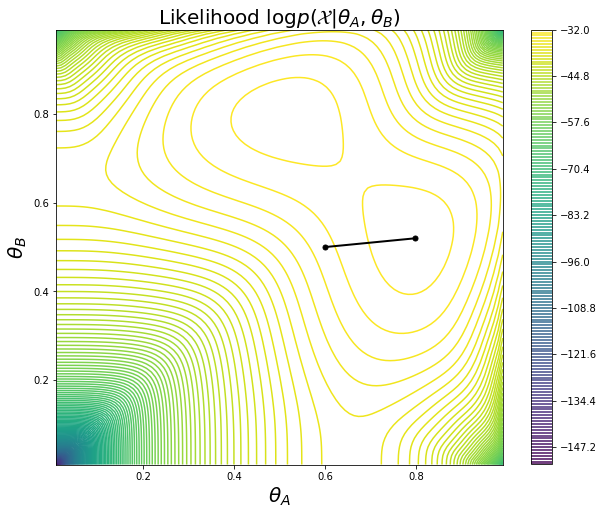

In [26]:
plot_coin_likelihood(rolls, thetas)

### Another example

Let's run it again with different initial biases. Notice it converges to a different local optima.

In [27]:
thetas2, _ = coin_em(rolls, 0.4, 0.7, prior_A=0.5, maxiter=10)

#0:	0.40 0.70
#1:	0.48 0.76
#2:	0.50 0.78
#3:	0.51 0.79
#4:	0.52 0.79
#5:	0.52 0.80
#6:	0.52 0.80
#7:	0.52 0.80
#8:	0.52 0.80
#9:	0.52 0.80


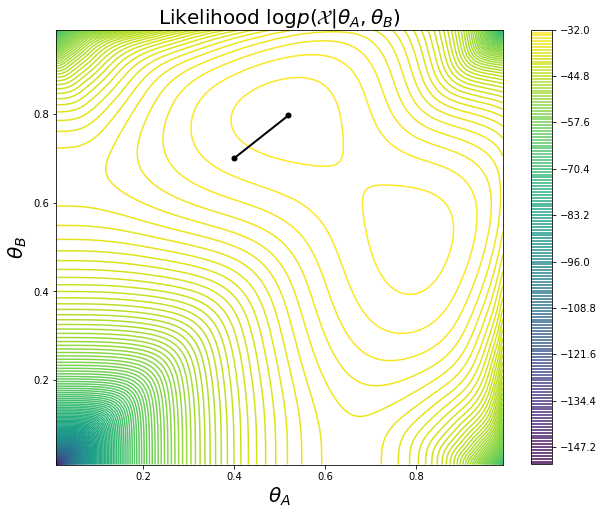

In [28]:
plot_coin_likelihood(rolls, thetas2)

## References

 - I gratefully acknowledge the material from [Karl Rosaen's blog](http://karlrosaen.com/ml/notebooks/em-coin-flips/).
 - [This introductory paper on EM](https://www.nature.com/articles/nbt1406)